In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('./ds_salaries.csv')
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
data['experience_level'] = data['experience_level'] \
    .astype('category') \
    .cat \
    .set_categories(['EN', 'MI', 'SE', 'EX'], ordered=True)

In [4]:
salaries_usd=data['salary_in_usd'].copy()
salaries_usd

0        85847
1        30000
2        25500
3       175000
4       120000
         ...  
3750    412000
3751    151000
3752    105000
3753    100000
3754     94665
Name: salary_in_usd, Length: 3755, dtype: int64

In [5]:
data_to_process=data
data_to_process

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [6]:
data_of_interest=data_to_process.drop(columns=['salary','salary_currency']).copy()
data_of_interest

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


# work_year

<Axes: ylabel='Frequency'>

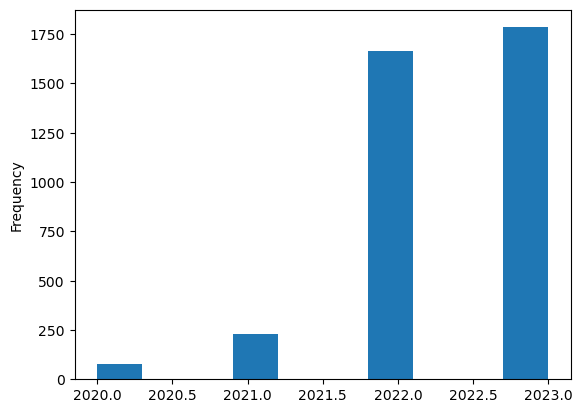

In [7]:
data_of_interest['work_year'].plot.hist()

# experience_level

<Axes: >

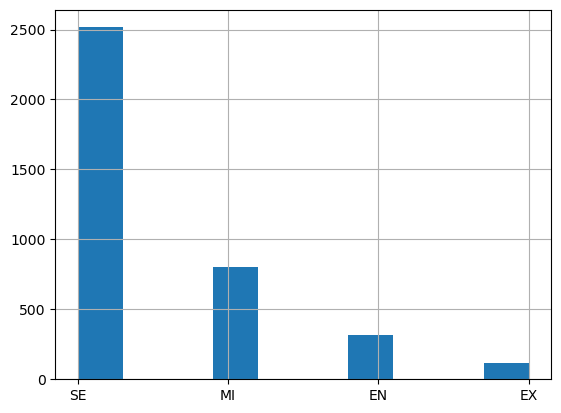

In [8]:
data_of_interest['experience_level'].hist()

# job_title

In [9]:
data_of_interest['job_title'].describe()

count              3755
unique               93
top       Data Engineer
freq               1040
Name: job_title, dtype: object

# company_location

<Axes: >

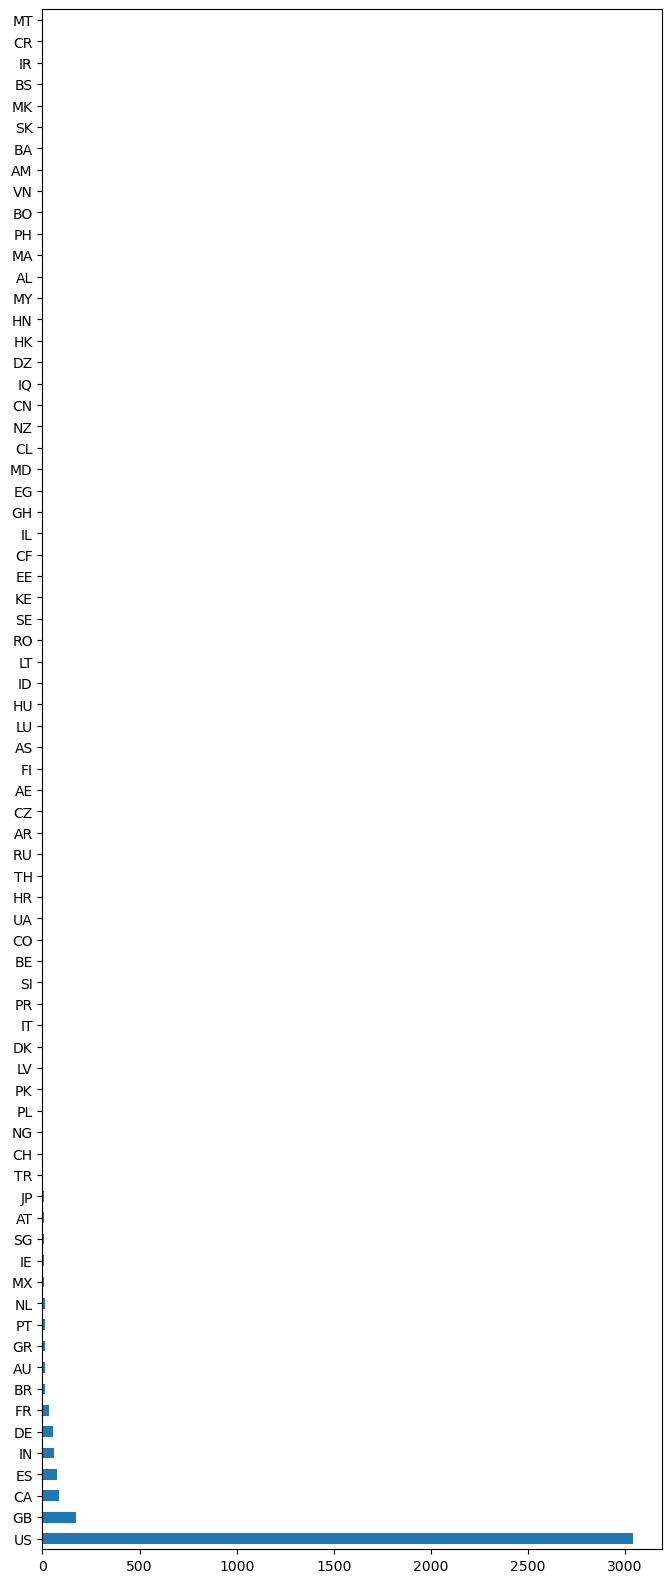

In [10]:
plt.figure(figsize=(8, 20))
data_of_interest['company_location'].value_counts().plot.barh()

In [11]:
count = data_of_interest['company_location'].value_counts()

filtered = count[count > 15]
filtered

US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
Name: company_location, dtype: int64

In [12]:
data_of_interest = data_of_interest.loc[data_of_interest['company_location'].isin(filtered.index), :]

In [13]:
data_of_interest = data_of_interest[data_of_interest['company_location'] == "US"]
data_of_interest['company_location']

1       US
2       US
5       US
6       US
9       US
        ..
3749    US
3750    US
3751    US
3752    US
3753    US
Name: company_location, Length: 3040, dtype: object

<Axes: >

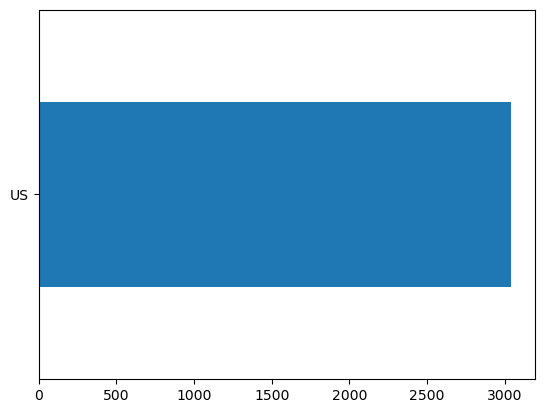

In [14]:
data_of_interest['company_location'].value_counts().plot.barh()

<Axes: >

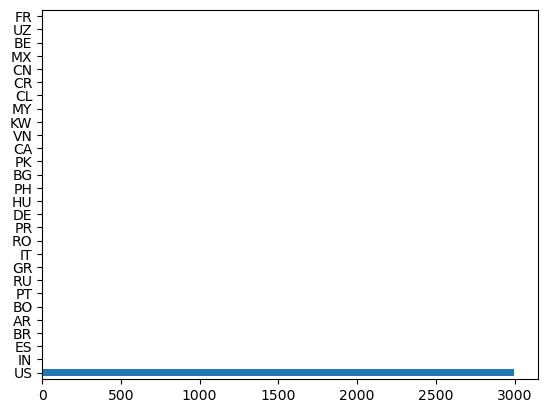

In [15]:
data_of_interest['employee_residence'].value_counts().plot.barh()

<Axes: >

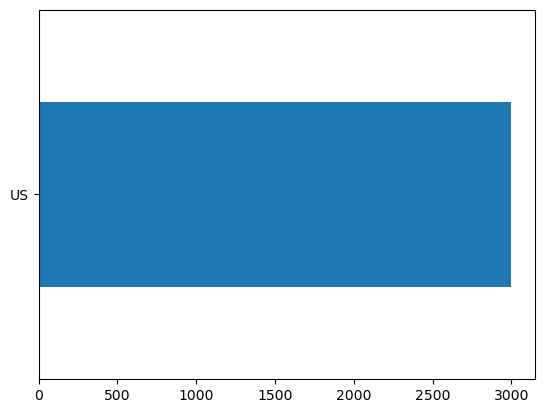

In [16]:
data_of_interest = data_of_interest[data_of_interest['employee_residence'] == "US"]
data_of_interest['employee_residence'].value_counts().plot.barh()

In [17]:
data_of_interest = data_of_interest.drop(columns=['employee_residence', 'company_location'])

# remote_ratio

<Axes: >

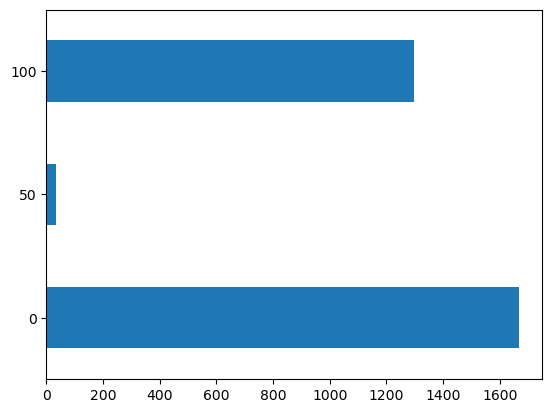

In [18]:
data_of_interest['remote_ratio'].value_counts().sort_index().plot.barh()

<Axes: >

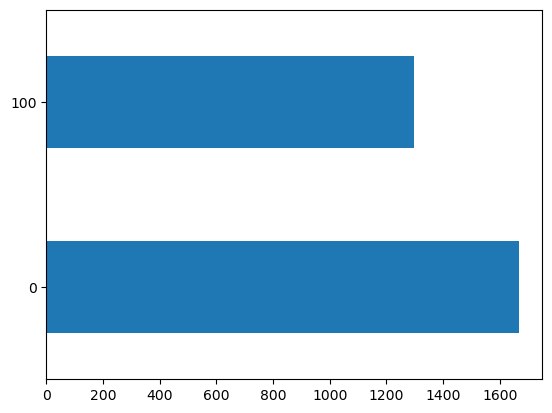

In [19]:
data_of_interest = data_of_interest[data_of_interest['remote_ratio'] != 50]
data_of_interest['remote_ratio'].value_counts().sort_index().plot.barh()

# company_size

<Axes: >

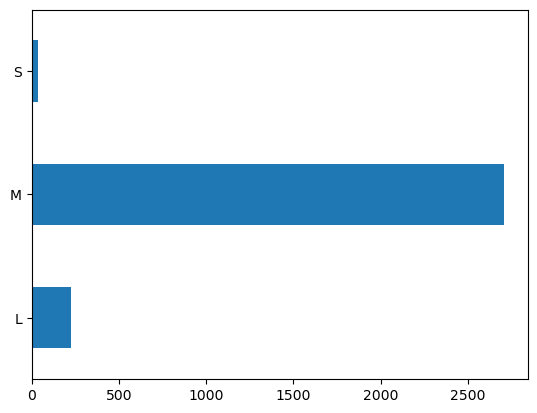

In [20]:
data_of_interest['company_size'].value_counts().sort_index().plot.barh()

<Axes: >

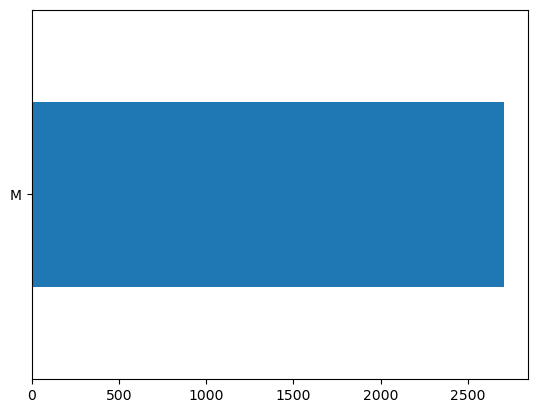

In [21]:
data_of_interest = data_of_interest[data_of_interest['company_size'] == "M"]
data_of_interest['company_size'].value_counts().sort_index().plot.barh()

# salary

<Axes: ylabel='Frequency'>

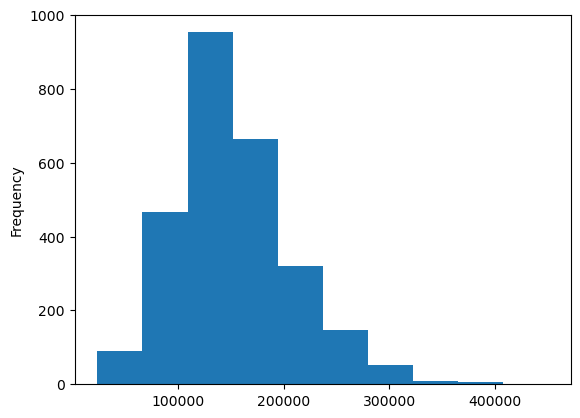

In [22]:
data_of_interest['salary_in_usd'].plot.hist()

In [23]:
data_of_interest['log_salary'] = np.log10(data_of_interest['salary_in_usd'])

<Axes: ylabel='Frequency'>

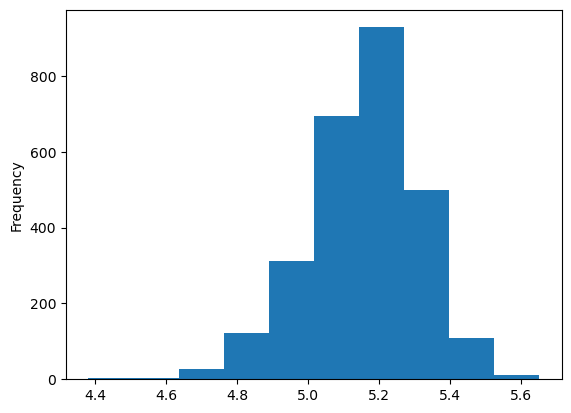

In [24]:
data_of_interest['log_salary'].plot.hist()

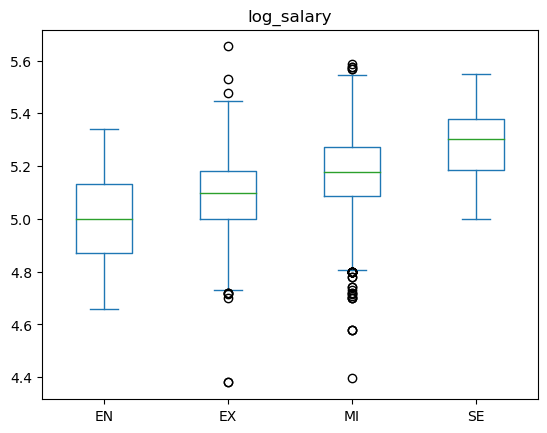

In [25]:
data_of_interest[['log_salary', 'experience_level']].plot.box(by='experience_level');

In [26]:
#data_of_interest[(data_of_interest['log_salary'] < 4.25) & (data_of_interest['experience_level'] == 'EN')]

<Axes: ylabel='Frequency'>

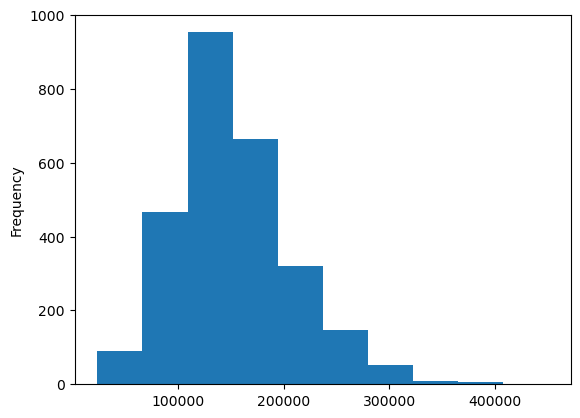

In [27]:
data_of_interest['salary_in_usd'].plot.hist()

In [28]:
data_of_interest['log_salary'] = np.log10(data_of_interest['salary_in_usd'])

<Axes: ylabel='Frequency'>

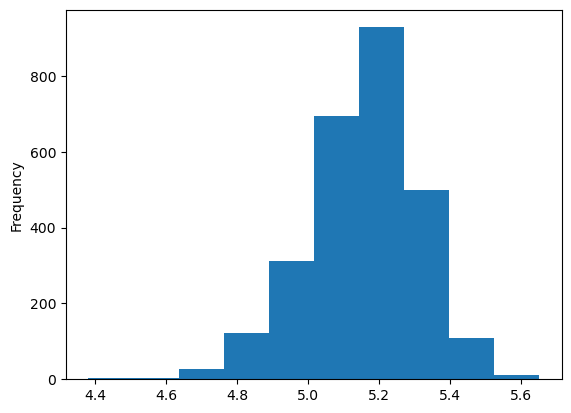

In [29]:
data_of_interest['log_salary'].plot.hist()

In [30]:
data['job_title'].unique()


data.loc[data['job_title'].str.contains('Data Scientist', case=False), 'job_title'] = 'Data Scientist'


data.loc[data['job_title'].str.contains('Data Engineer', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Data Analyst', case=False), 'job_title'] = 'Data Analyst'


data.loc[data['job_title'].str.contains('Data Analytics', case=False), 'job_title'] = 'Data Analyst'


data.loc[data['job_title'].str.contains('Data Architect', case=False), 'job_title'] = 'Data Architect'

data.loc[data['job_title'].str.contains('Data Science', case=False), 'job_title'] = 'Data Scientist'


data.loc[data['job_title'].str.contains('Machine Learning Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'

data.loc[data['job_title'].str.contains('Computer Vision', case=False), 'job_title'] = 'Machine Learning Engineer'

data.loc[data['job_title'].str.contains('ML Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'

data.loc[data['job_title'].str.contains('AI Scientist', case=False), 'job_title'] = 'AI Scientist'


data.loc[data['job_title'].str.contains('Machine Learning Developer', case=False), 'job_title'] = 'AI Developer'


data.loc[data['job_title'].str.contains('Power BI Developer', case=False), 'job_title'] = 'BI Developer'


data.loc[data['job_title'].str.contains('Machine Learning Software Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Machine Learning Research Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Deep Learning Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Deep Learning Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Data Operations Engineer', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Data DevOps Engineer', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Data Quality Analyst', case=False), 'job_title'] = 'Data Analyst'

data.loc[data['job_title'].str.contains('BI Analyst', case=False), 'job_title'] = 'Data Analyst'


data.loc[data['job_title'].str.contains('Insight Analyst', case=False), 'job_title'] = 'Data Analyst'


data.loc[data['job_title'].str.contains('Data Operations Analyst', case=False), 'job_title'] = 'Data Analyst'


data.loc[data['job_title'].str.contains('Applied Machine Learning Scientist', case=False), 'job_title'] = 'Machine Learning Scientist'


data.loc[data['job_title'].str.contains('Machine Learning Researcher', case=False), 'job_title'] = 'Machine Learning Scientist'


data.loc[data['job_title'].str.contains('Machine Learning Infrastructure Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Data Modeler', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Data Architect', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Data Infrastructure Engineer', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Cloud Database Engineer', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Applied Scientist', case=False), 'job_title'] = 'Data Scientist'

data.loc[data['job_title'].str.contains('BI', case=False), 'job_title'] = 'Business Intelligence'


data.loc[data['job_title'].str.contains('Business Intelligence', case=False), 'job_title'] = 'Business Intelligence'


data.loc[data['job_title'].str.contains('Deep Learning Researcher', case=False), 'job_title'] = 'Machine Learning Scientist'


data.loc[data['job_title'].str.contains('AI Programmer', case=False), 'job_title'] = 'AI Developer'


data.loc[data['job_title'].str.contains('NLP Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Data Management Specialist', case=False), 'job_title'] = 'Data Specialist'

data.loc[data['job_title'].str.contains('Data Manager', case=False), 'job_title'] = 'Manager Data'

data.loc[data['job_title'].str.contains('Head of Data', case=False), 'job_title'] = 'Manager Data'

data.loc[data['job_title'].str.contains('Data Lead', case=False), 'job_title'] = 'Manager Data'

data.loc[data['job_title'].str.contains('Manager Data Management', case=False), 'job_title'] = 'Manager Data'

data.loc[data['job_title'].str.contains('Machine Learning Manager', case=False), 'job_title'] = 'Manager Machine Learning'

data.loc[data['job_title'].str.contains('Head of Machine Learning', case=False), 'job_title'] = 'Manager Machine Learning'

In [31]:
data.loc[data['job_title'].str.contains('AI Scientist', case=False), 'job_title'] = 'Machine Learning Scientist'

data['job_title'].nunique()

data = data.drop(data_to_process[data_to_process.job_title == "Autonomous Vehicle Technician"].index)

data["job_title"].value_counts()

Data Engineer                 1196
Data Scientist                1045
Data Analyst                   718
Machine Learning Engineer      394
Analytics Engineer             103
Research Scientist              82
Machine Learning Scientist      61
Manager Data                    42
Research Engineer               37
AI Developer                    20
Business Intelligence           18
Data Specialist                 15
ETL Developer                   10
MLOps Engineer                   4
Manager Machine Learning         4
ETL Engineer                     2
Data Strategist                  2
Name: job_title, dtype: int64

Decisão: eliminar job_titles de AI Developer para baixo

In [32]:
count = data_of_interest['job_title'].value_counts()

filtered = count[count > 20]
filtered

Data Engineer                849
Data Scientist               606
Data Analyst                 487
Machine Learning Engineer    192
Data Architect                90
Analytics Engineer            90
Research Scientist            53
Data Science Manager          46
Research Engineer             31
Applied Scientist             28
Data Manager                  24
Name: job_title, dtype: int64

<Axes: >

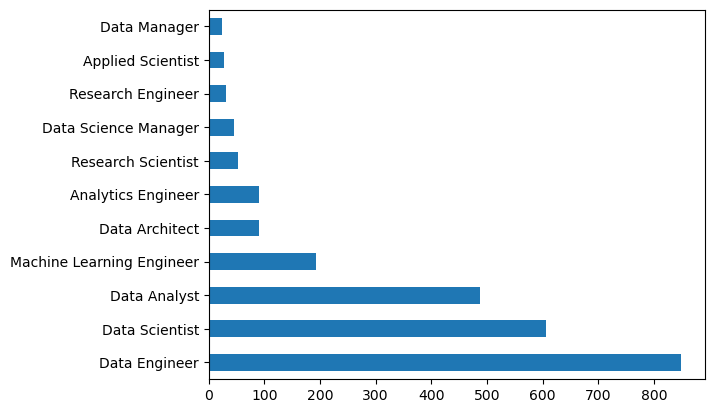

In [33]:
data_of_interest = data_of_interest.loc[data_of_interest['job_title'].isin(filtered.index), :]
data_of_interest['job_title'].value_counts().plot.barh()

# salary

<Axes: ylabel='Frequency'>

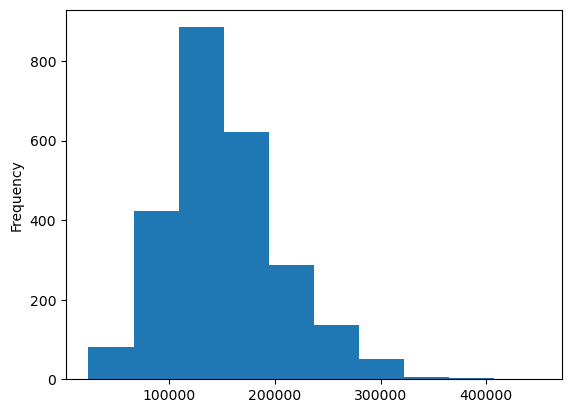

In [34]:
data_of_interest['salary_in_usd'].plot.hist()

In [35]:
data_of_interest['log_salary'] = np.log10(data_of_interest['salary_in_usd'])

<Axes: ylabel='Frequency'>

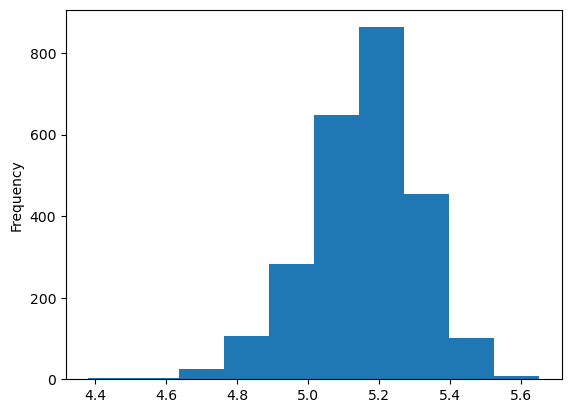

In [36]:
data_of_interest['log_salary'].plot.hist()

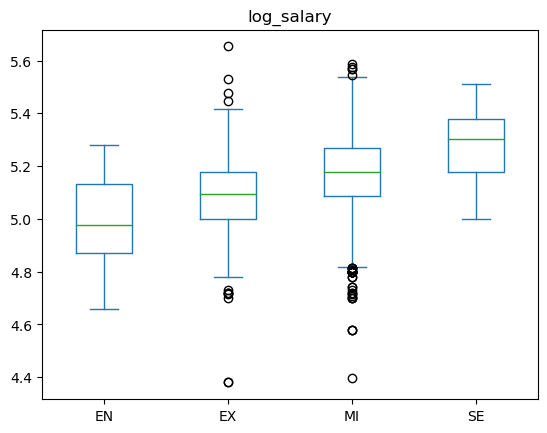

In [37]:
data_of_interest[['log_salary', 'experience_level']].plot.box(by='experience_level');

In [38]:
for c in data.columns:
    print(c)

work_year
experience_level
employment_type
job_title
salary
salary_currency
salary_in_usd
employee_residence
remote_ratio
company_location
company_size


In [39]:
data_of_interest

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,log_salary
9,2023,SE,FT,Data Scientist,147100,0,M,5.167613
10,2023,SE,FT,Data Scientist,90700,0,M,4.957607
11,2023,SE,FT,Data Analyst,130000,100,M,5.113943
12,2023,SE,FT,Data Analyst,100000,100,M,5.000000
17,2023,SE,FT,Data Scientist,170000,0,M,5.230449
...,...,...,...,...,...,...,...,...
3636,2021,MI,FT,Data Engineer,93150,0,M,4.969183
3704,2021,SE,FT,Data Engineer,165000,0,M,5.217484
3740,2020,SE,FT,Data Science Manager,190200,100,M,5.279211
3741,2020,MI,FT,Data Scientist,118000,100,M,5.071882


In [40]:
data_of_interest = data_of_interest.drop(columns=['work_year', 'remote_ratio'])

In [41]:
data_of_interest = data_of_interest[data_of_interest['employment_type'] == "FT"]
data_of_interest = data_of_interest.drop(columns=["employment_type"])

In [42]:
data_of_interest = pd.get_dummies(data_of_interest, drop_first=True)

# modelo

In [43]:
y = data_of_interest['salary_in_usd'].copy()
X = data_of_interest.drop(columns=['salary_in_usd', 'log_salary']).copy()


In [44]:
X.shape, y.shape

((2495, 13), (2495,))

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [46]:
X_train_valid, X_test_valid, y_train_valid, y_test_valid = train_test_split(X_train, y_train, test_size=0.33)

# modelo 1: regressao linear simples

In [47]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train_valid, y_train_valid)

y_pred = model.predict(X_test_valid)
RMSE = math.sqrt(mean_squared_error(y_test_valid, y_pred))
RMSE

47474.01205882988

In [48]:
model.intercept_

105854.4531394458

In [49]:
list(zip(X_test_valid.columns, model.coef_))

[('experience_level_MI', 21218.945670111007),
 ('experience_level_SE', 47310.171144630294),
 ('experience_level_EX', 87646.80407599972),
 ('job_title_Applied Scientist', 38743.06802361614),
 ('job_title_Data Analyst', -26043.711802440153),
 ('job_title_Data Architect', 23082.630888360633),
 ('job_title_Data Engineer', 5276.098484749572),
 ('job_title_Data Manager', -23003.594930210118),
 ('job_title_Data Science Manager', 56770.1270316121),
 ('job_title_Data Scientist', 11267.259678016922),
 ('job_title_Machine Learning Engineer', 23558.384653893772),
 ('job_title_Research Engineer', 27619.070071388454),
 ('job_title_Research Scientist', 33084.76783387258)]

In [50]:
import matplotlib.pyplot as plt

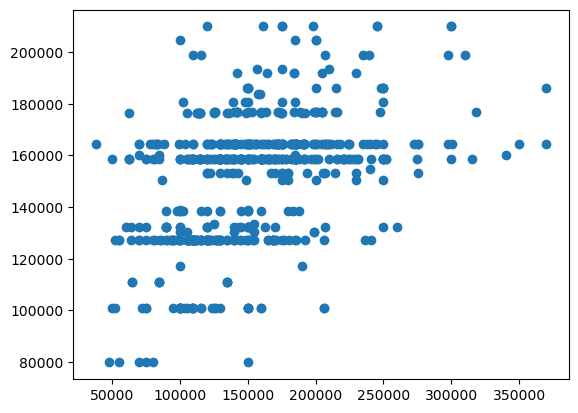

In [51]:
plt.scatter(y_test_valid, y_pred)

Text(0, 0.5, 'Erro [$]')

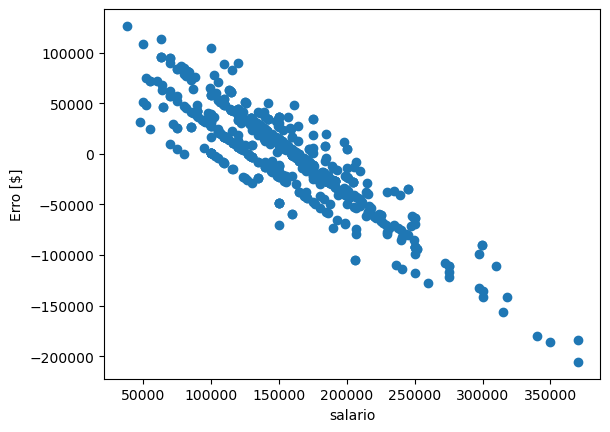

In [52]:
erro = y_pred - y_test_valid

plt.scatter(y_test_valid, erro)
plt.xlabel('salario')
plt.ylabel('Erro [$]')

In [53]:
erro_percentual = 100.0 * (erro / y_test_valid)

(-100.0, 100.0)

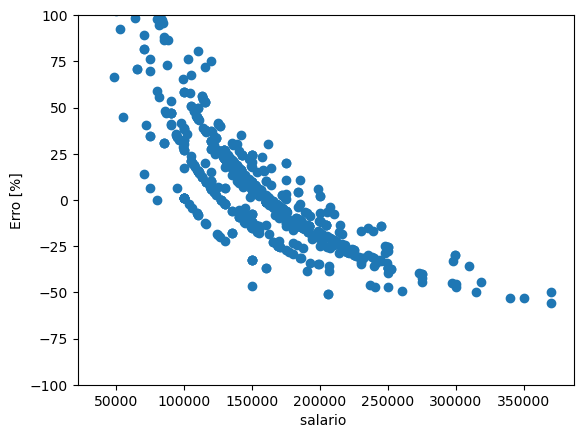

In [54]:
plt.scatter(y_test_valid, erro_percentual)
plt.xlabel('salario ')
plt.ylabel('Erro [%]')
plt.ylim(-100, 100)

# modelo polinomial de grau 2

In [55]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2, include_bias=False)
X_train_valid_transf = transformer.fit_transform(X_train_valid)

In [56]:
X_train_valid_transf.shape

(1253, 104)

In [57]:
from sklearn.linear_model import Ridge
model = Ridge()

model.fit(X_train_valid_transf, y_train_valid)

Ridge()

In [58]:
X_test_valid_transf = transformer.transform(X_test_valid)
y_pred = model.predict(X_test_valid_transf)

In [59]:
RMSE = math.sqrt(mean_squared_error(y_test_valid, y_pred))
RMSE

47777.93246689357

In [60]:
aux = y_pred - y_test_valid
aux[aux > 1e6]

Series([], Name: salary_in_usd, dtype: float64)

(0.0, 500000.0)

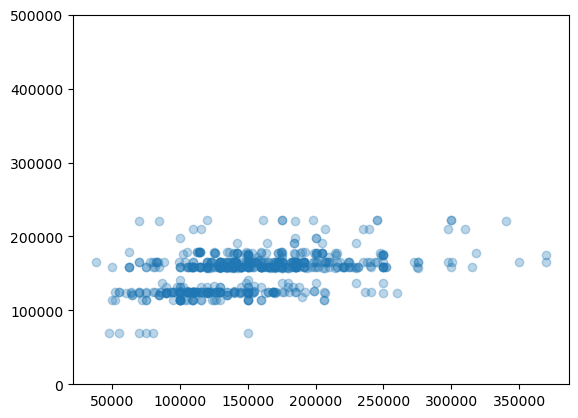

In [61]:
plt.scatter(y_test_valid, y_pred, alpha=0.3)
plt.ylim([0, 5e5])

Text(0, 0.5, 'Erro [$]')

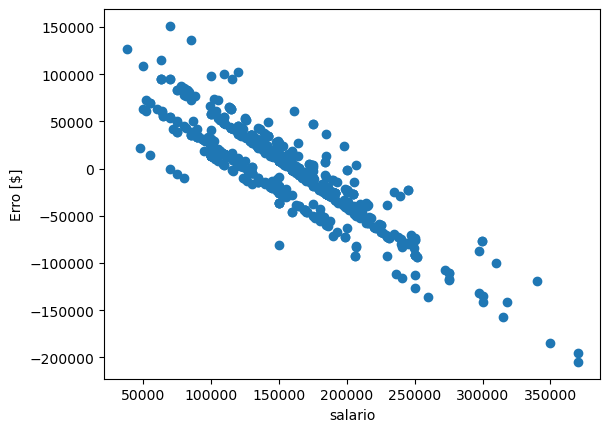

In [62]:
erro = y_pred - y_test_valid

plt.scatter(y_test_valid, erro)
plt.xlabel('salario')
plt.ylabel('Erro [$]')

In [63]:
erro_percentual = 100.0 * (erro / y_test_valid)

(-100.0, 100.0)

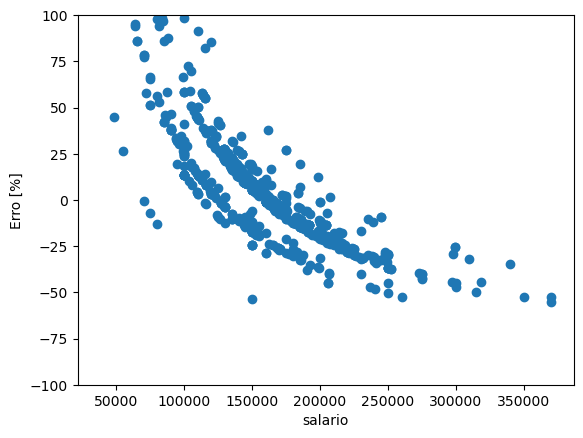

In [64]:
plt.scatter(y_test_valid, erro_percentual)
plt.xlabel('salario')
plt.ylabel('Erro [%]')
plt.ylim(-100, 100)